# Unsupervised Machine Learning Lab with Scikit-learn

## Objectives
- Perform clustering using K-Means, Agglomerative Clustering, and DBSCAN
- Use PCA for dimensionality reduction and visualization
- Evaluate clustering quality using Adjusted Rand Index (ARI) and silhouette scores

Dataset: Digits (handwritten digit images, 0–9)


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, silhouette_score
import scipy.cluster.hierarchy as sch


## 1. Load and Explore the Dataset

In [25]:
digits = load_digits()
X = digits.data
y = digits.target

print("Data shape:", X.shape)
print("Target shape:", y.shape)

Data shape: (1797, 64)
Target shape: (1797,)


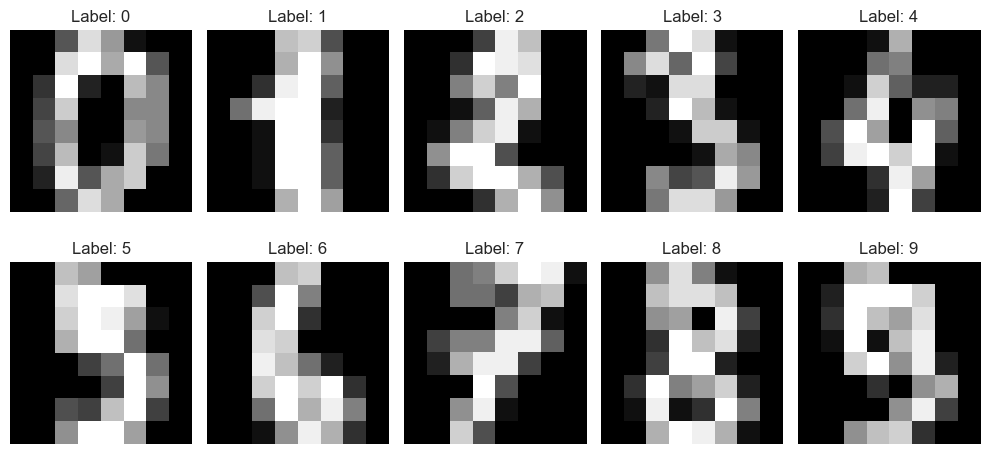

In [26]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

## 2. Data Preprocessing

In [27]:
##TO DO: Apply Standard Scaler ()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)   # scaled output

## 3. K-Means Clustering

In [28]:
##TO DO: Apply K-Means clustering with K=10 clusters
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_scaled)
clusters = kmeans.labels_

#Evaluate ARI and silhouette scores
ari = adjusted_rand_score(y, clusters)
silhouette = silhouette_score(X_scaled, clusters)
print("Adjusted Rand Index pour K-Means:", ari)
print("Silhouette Score pour K-Means:", silhouette)

Adjusted Rand Index pour K-Means: 0.5305122615593327
Silhouette Score pour K-Means: 0.13558208876901615


## TO DO: Search within documentation for ARI and silhouette scores and explain how they are computed and what they represent.

Silhouette:
- Le Silhouette Score mesure la cohésion et la séparation des clusters.
- Il est calculé pour chaque point comme la différence entre la distance moyenne intra-cluster et la distance moyenne au cluster le plus proche, normalisée par
- la valeur maximale de ces distances. La valeur varie entre -1 et 1, où une valeur proche de 1 indique des clusters bien séparés.

ARI:
- L'Adjusted Rand Index (ARI) quantifie la similarité entre les clusters trouvés par l'algorithme et les vraies étiquettes. Il ajuste la Rand Index de manière à tenir compte du hasard. ARI varie de -1 à 1, avec 1 indiquant une correspondance parfaite.

## 4. PCA Visualization of K-Means Results

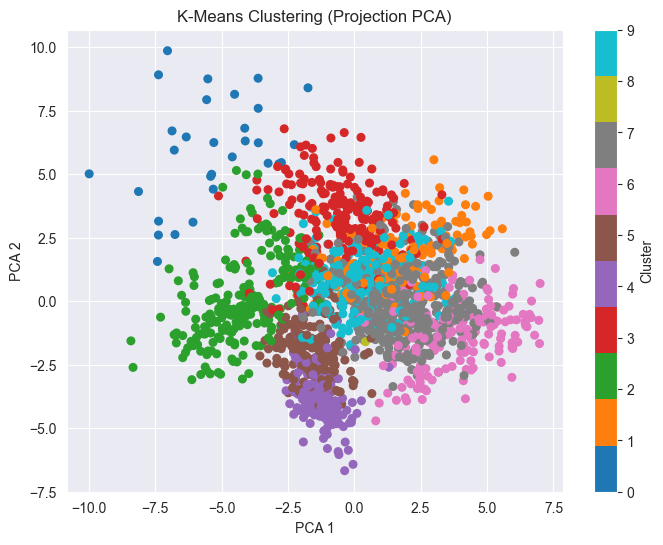

In [29]:
##TO DO: Apply PCA (with 2 components) on K-Means clustering results

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='tab10', s=30)
plt.title("K-Means Clustering (Projection PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster')
plt.show()

## 5. Agglomerative Clustering

ARI (Agglomératif vs vrai): 0.6643458356002894
Silhouette Score (Agglomératif): 0.12532527779196986


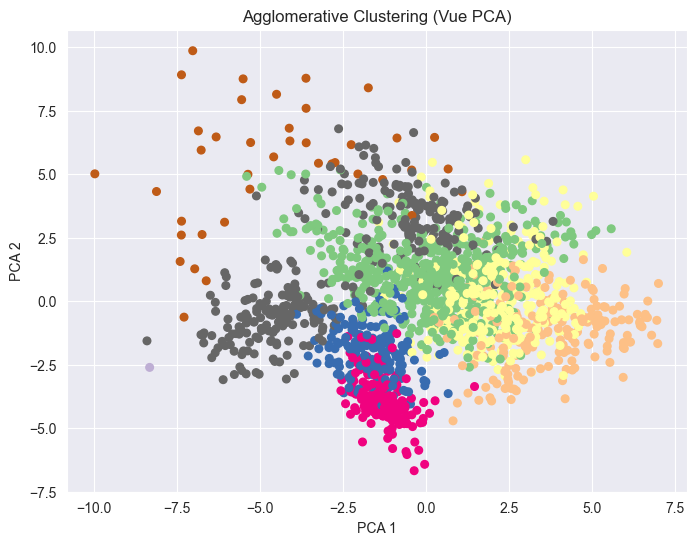

In [30]:
##TO DO: Apply agglomerative clustering (10 clusters) then evaluate the results
##  using ARI and silhoutte scores
agglo = AgglomerativeClustering(n_clusters=10)
agglo_labels = agglo.fit_predict(X_scaled)

ari_agglo = adjusted_rand_score(y, agglo_labels)
silhouette_agglo = silhouette_score(X_scaled, agglo_labels)

print("ARI (Agglomératif vs vrai):", ari_agglo)
print("Silhouette Score (Agglomératif):", silhouette_agglo)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agglo_labels, cmap='Accent', s=30)
plt.title("Agglomerative Clustering (Vue PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

## 6. Dendrogram (First 100 Samples)

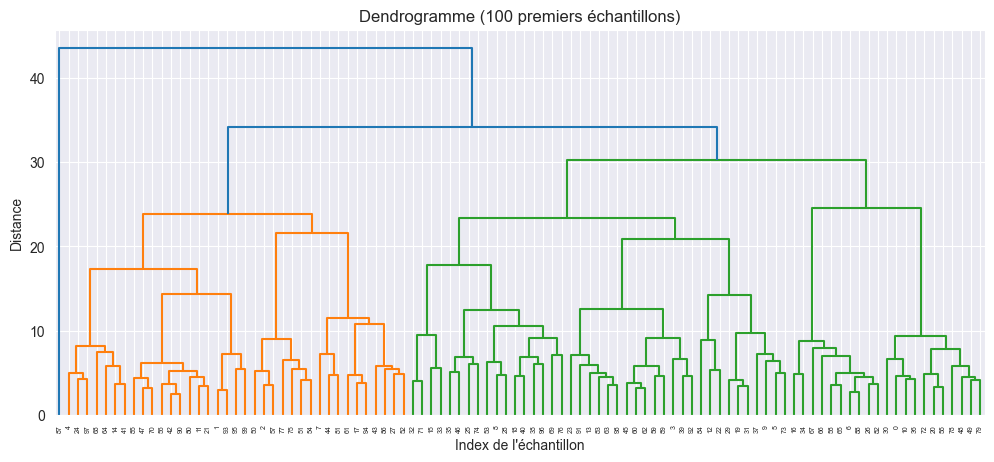

In [31]:
plt.figure(figsize=(12, 5))
sample = X_scaled[:100]
dendrogram = sch.dendrogram(sch.linkage(sample, method='ward'))
plt.title("Dendrogramme (100 premiers échantillons)")
plt.xlabel("Index de l'échantillon")
plt.ylabel("Distance")
plt.show()

## 7. Additional tasks

### 7.1. Evaluate K-Means with Different Numbers of Clusters

In [32]:
scores = []
K_values = range(5, 16)
for k in K_values:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    km_labels = km.labels_
    score = silhouette_score(X_scaled, km_labels)
    scores.append(score)

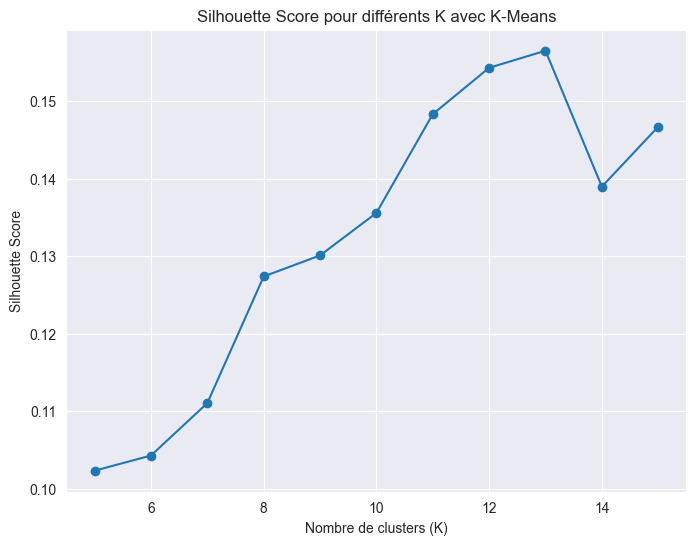

In [33]:
plt.figure(figsize=(8, 6))
plt.plot(list(K_values), scores, marker='o')
plt.title("Silhouette Score pour différents K avec K-Means")
plt.xlabel("Nombre de clusters (K)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

### 7.2. Try DBSCAN

In [34]:
db = DBSCAN(eps=2.5, min_samples=5)
db_labels = db.fit_predict(X_scaled)

n_clusters = len(set(db_labels)) - (1 if -1 in db_labels else 0)
print(f"Nombre estimé de clusters (hors bruit): {n_clusters}")
ari_db = adjusted_rand_score(y, db_labels)
print("ARI (DBSCAN vs vrai):", ari_db)

Nombre estimé de clusters (hors bruit): 2
ARI (DBSCAN vs vrai): 0.0015006875131325513


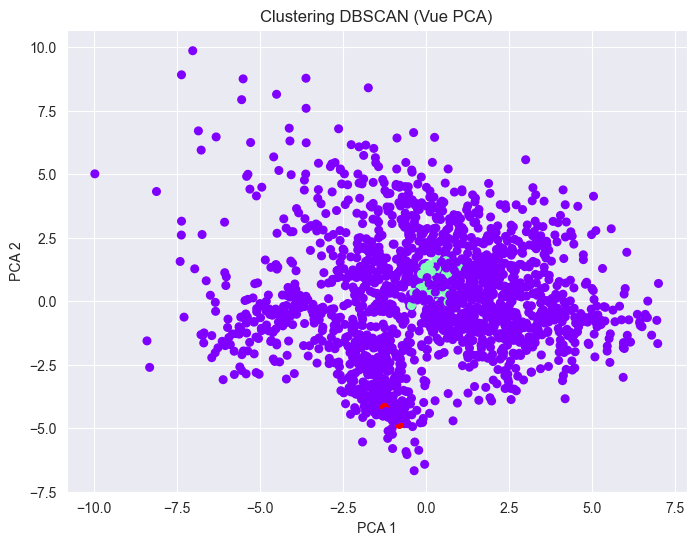

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=db_labels, cmap='rainbow', s=30)
plt.title("Clustering DBSCAN (Vue PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()